<a href="https://colab.research.google.com/github/imyoungchae/Ai/blob/main/1101%EC%97%B0%EA%B5%AC%EC%8B%A4MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys, os
sys.path.append("/content/gdrive/MyDrive/deep-learning-from-scratch-master/deep-learning-from-scratch-master")

In [ ]:
import sys, os
sys.path.append("/content/gdrive/MyDrive/deep-learning-from-scratch-master/deep-learning-from-scratch-master/dataset")

In [ ]:
import sys, os
sys.path.append("/content/gdrive/MyDrive/deep-learning-from-scratch-master/deep-learning-from-scratch-master/ch05")

In [ ]:
import sys, os
sys.path.append("/content/gdrive/MyDrive/deep-learning-from-scratch-master/deep-learning-from-scratch-master/common")

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from multi_layer_net import MultiLayerNet
import sys
import os

sys.path.append("/content/gdrive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/deep-learning-from-scratch-master")
import numpy as np

(x_train,t_train),(x_test,t_test)= load_mnist(normalize=True,one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100],output_size=10)

iter_per_epoch = max(train_size / batch_size, 1)
start = time.time()

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train,test : "+str(train_acc)+","+str(test_acc))

print("time :", time.time() - start)


train,test : 0.19456666666666667,0.1942
train,test : 0.9294166666666667,0.9267
train,test : 0.9507666666666666,0.9479
train,test : 0.95815,0.9537
train,test : 0.9637,0.9593
train,test : 0.9688166666666667,0.9651
train,test : 0.9728166666666667,0.9667
train,test : 0.9723,0.9671
train,test : 0.9772,0.9713
train,test : 0.9774,0.9719
train,test : 0.98045,0.9728
train,test : 0.9827833333333333,0.9738
train,test : 0.98335,0.975
train,test : 0.9840833333333333,0.9749
train,test : 0.9860333333333333,0.9744
train,test : 0.9856333333333334,0.9741
train,test : 0.9871666666666666,0.9754
time : 116.67646265029907


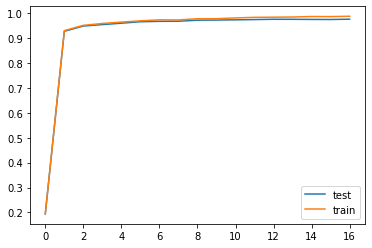

In [ ]:
from matplotlib import pyplot as plt
test=test_acc_list
train=train_acc_list
plt.plot(test)
plt.plot(train)
plt.legend(['test','train'])

숫자는 8 입니다.


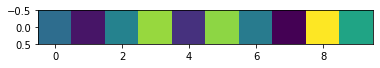

In [ ]:
import cv2
file_name = 'number1.png'
image = cv2.imread(file_name)
image2 = np.resize(image, (1, 784))
test_data = ((np.array(image2)/ 255) - 1) * -1
test_data=network.predict(image2)
whos_new=np.argmax(test_data)
print("숫자는",whos_new,"입니다.")
plt.imshow(test_data)
plt.show()

In [ ]:
import cv2
file_name = 'number7.png'
image = cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
print("grey?: ", image.shape)
image2 = np.resize(image, (1, 784))
test_data = ((np.array(image2) / 255) - 1) * -1
print(test_data.shape)
test_data=network.predict(test_data)
whos_new=np.argmax(test_data)
print("숫자는",whos_new,"입니다.")
plt.imshow(image)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
test=test_acc_list
train=train_acc_list
plt.plot(test)
plt.plot(train)
plt.legend(['test','train'])
